# Periodicity and waves

This section introduces the concept of *periodicity*, which characterizes repeating signals.  This idea is central to many concepts in both signal processing and perception of audio, so it's worth spending some time with!

Specifically, this section covers the following topics:

- Periodicity

- Fundamental frequency

- Waves (sinusoids) and their parameters

- Basic properties of waves

---

## Periodicity

A signal $x(t)$ is said to be *periodic* if there exists some finite $t_0 > 0$ such that for every time $t$,

$$
x(t + t_0) = x(t).
$$

The smallest such $t_0$ satisfying this equation, if it exists, it is called the *fundamental period* (or sometimes just *period*) of the signal $x$.
Different signals may have different periods, and some signals may have no period at all.

Think of the period of a signal as the shortest amount of time it takes, when listening to a looped recording, before you hear the recording start over.

### Example: pulse train

A *pulse* train is a special kind of signal that consists only of ones and zeros, with the ones being separated at regular intervals.
An example pulse train with a spacing of 1.5 second between pulses can be defined mathematically as

$$
x_\perp(t) = \begin{cases}
1 & \text{ if } t \in 0, 1.5, 3, 4.5, \ldots\\
0 & \text{otherwise}
\end{cases}
$$

and the first few seconds are visualized below:

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cycler
import matplotlib.path as path
import matplotlib.patches as patches

import warnings
warnings.simplefilter('ignore')

from matplotlib.animation import FuncAnimation
import matplotlib.style
matplotlib.style.use('bauhaus')

np.random.seed(20200101)

colors = [_['color'] for _ in list(matplotlib.rcParams['axes.prop_cycle'])]

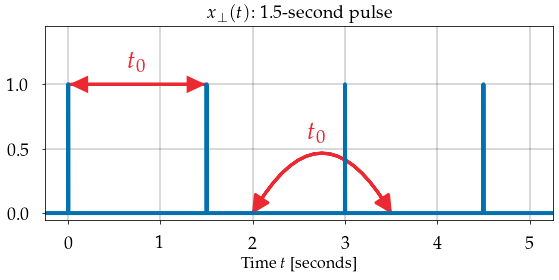

In [2]:
fs = 1000
t = np.linspace(-0.25, 5.25, endpoint=False, num=int(5.5 * fs))
x = np.zeros_like(t)
x[t / 1.5 == np.round(t/1.5)] = 1


plt.figure(figsize=(8,4))

plt.plot(t, x, label=r'$x_\perp(t)$')
plt.title(r'$x_\perp(t)$: 1.5-second pulse')
plt.xlabel('Time $t$ [seconds]');

style="simple,tail_width=0.5,head_width=0.1,head_length=0.2"
kw = dict(color=colors[1], linewidth=3)
plt.arrow(0, 1.0, 1.3, 0,  head_width=0.1, **kw)
plt.arrow(1.5, 1.0, -1.3, 0, head_width=0.1, **kw)

a2 = patches.FancyArrowPatch((2.,0.0), (3.5,0.0), connectionstyle="angle3,angleA=60,angleB=-60",  arrowstyle='simple, head_width=15, head_length=15', **kw)
a3 = patches.FancyArrowPatch((3.5,0.0), (2.,0.0), connectionstyle="angle3,angleA=-60,angleB=60",  arrowstyle='simple, head_width=15, head_length=15', **kw)

plt.gca().add_patch(a2)
plt.gca().add_patch(a3)

plt.text(0.65, 1.1, r'$t_0$', color=colors[1], size=25);
plt.text(2.6, 0.55, r'$t_0$', color=colors[1], size=25);

plt.xlim([-0.25, 5.25])
plt.ylim([-0.05, 1.45]);

The figure above demonstrates the pulse train ($x_\perp(t)$), which has a pulse every 1.5 seconds.
The signal is periodic with $t_0 = 1.5$ because every point on the blue curve is identical to the point exactly $t_0$ seconds later.
Note that this must hold for **every** time $t$, not just the locations of the pulses!
The arrows indicate two such repetitions, though in general there will be infinitely many.

This points to a key consequence of periodicity.  **If a signal is periodic, it must repeat forever.**

---

## Aperiodic signals

If a signal does not have a period, we call it *aperiodic*, and assign period $t_0 = \infty$.
Think of this as meaning that you would have to wait (literally) forever before you see the signal repeat itself exactly.

Aperiodic signals come in all kinds of flavors.
Random noise (e.g., white noise) is aperiodic, and if it wasn't, we probably wouldn't call it noise.
However, don't think that all aperiodic signals are random or unpredictable.
For example, a monotonically increasing sequence $x(t) = t$ is perfectly predictable, but it is also aperiodic because you never see the same value twice.

As a final example, a staircase signal, which is like the monotonically increasing sequence but is piecewise constant, is also aperiodic even though you do see the same values multiple times.

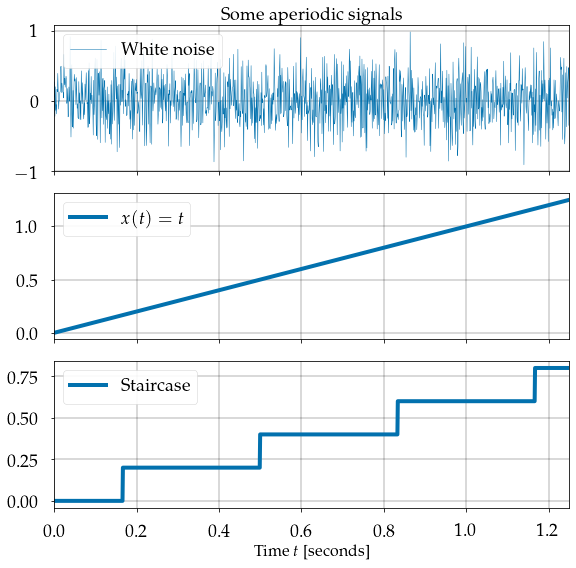

In [4]:
fs = 1000
t = np.linspace(0, 1.25, endpoint=False, num=int(1.25 * fs))

x1 = np.random.randn(len(t)) / 3
x1[t<0] = 0
x2 = np.maximum(t, 0)

x3 = np.round(x2 * 3) / 5

plt.figure()

ax = plt.subplot(3,1,1)
plt.plot(t, x1, label=r'White noise', linewidth=0.5)
plt.title('Some aperiodic signals')
plt.legend(loc='upper left')
plt.gca().tick_params(labelbottom=False)


plt.subplot(3, 1, 2, sharex=ax)
plt.plot(t, x2, label=r'$x(t)=t$')
plt.gca().tick_params(labelbottom=False)
plt.legend(ncol=1, loc='upper left')


plt.subplot(3, 1, 3, sharex=ax)
plt.plot(t, x3, label='Staircase')
plt.xlabel('Time $t$ [seconds]');
plt.legend(ncol=1, loc='upper left')


plt.xlim([-0.0, 1.25]);


There's a very real sense in which most signals are aperiodic.
We typically use periodicity as a a conceptual tool to understand idealized signals, but it's also helpful to remember that any signal of finite duration can be made periodic by playing it on a loop.
This idea will come back later when we get to the Fourier transform.

---

## Fundamental frequency

Periods are defined in units of time: how long must we wait before observing the signal repeat itself?
Often, it is more convenient to think in terms of *how many times* a signal repeats itself within a fixed duration of time, typically one second.

This idea provides a definition for **frequency**: how many cycles does a signal complete in one second?
Frequency is measured in units of Hertz (**Hz**), where 1 Hz denotes one full cycle in one second.

If a signal $x(t)$ has a fundamental period $t_0$, then its **fundamental frequency** is defined as

$$
f_0 = \frac{1}{t_0}.
$$

Note that $f_0$ need not be a whole number.  In the [pulse train example](#Example:-pulse-train) above, the period was $1.5$ seconds, which according to our definition, means that $f_0 = 2/3$ Hz, meaning that it completes two cycles in three seconds.  (The third cycle starts at $t=3$, as illustrated in the figure.)

If a signal is aperiodic, and has $t_0 = \infty$, then its fundamental frequency is defined to be $f_0 = 0$, meaning that it completes 0 cycles in 1 second, or any number of seconds.
Note that this definitions is primarily used for notational consistency --- if a signal is aperiodic, it is also common to say that it has no fundamental frequency.

### Why the $t_0$ and $f_0$ business?

At this point, you might (rightly) be wondering why we have these 0 subscripts on "fundamental" values.
There are two reasons for this:

1. To distiguish fundamental period ($t_0$) or frequency ($f_0$) from arbitrary times ($t$) or frequencies ($f$), and
2. To highlight the connection between the fundamental $f_0$ and "harmonics" or "overtones", which are often notated as $f_1, f_2, \cdots$.

The first point is a somewhat arbitrary convention, but the second point is definitely not arbitrary.
However, it's important to keep in mind that any periodic signal will have a fundamental frequency, but we typically only discuss harmonics in the context of "pure tones" generated by sinusoidal waves.

This naturally leads us to the question: what is a wave?

---

## Waves

So far, we've discussed arbitrary signals in terms of their periodicity properties, and seen examples of periodic and aperiodic signals.
There are many kinds of periodic signals: pulse trains, square waves, triangle waves, sawtooth waves, just to name a few.
Among all periodic signals, **sinusoids** (e.g., sine and cosine waves like the figure below) are in many ways, the most important and mathematically well-behaved --- so much so, that the term *wave* is often used synonymously with the more specific *sinusoid*.

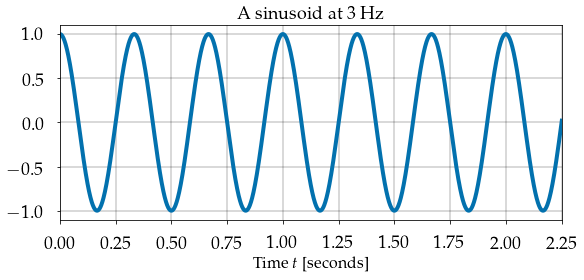

In [5]:
fs = 1000
t = np.linspace(0, 2.5, endpoint=False, num=int(2.5 * fs))

f = 3

x = np.cos(2 * np.pi * f * t)

plt.figure(figsize=(8,4))

plt.plot(t, x)
plt.title(f'A sinusoid at {f} Hz')
plt.xlabel('Time $t$ [seconds]');
plt.xlim([-0.00, 2.25]);


### What makes sinusoids special?

While many readers with some prior familiarity with audio have an intuitive grasp of sinusoids as "pure tones", it's often not clearly stated **why** sinusoids are so well-suited to signal processing and analysis, or where they come from in the first place.
The reasons underlying the use of sinusoidal waves go mathematically deep, but the basic principles can be understood directly in terms of geometry.

Keep in mind that our goal here is to understand periodicities in signals.
The physical universe readily supplies us with countless examples of periodic phenomena: think about the rotation of the Earth (day and night cycles), the orbit of the Moon around the Earth (full and new Moon cycles), the Earth orbiting the sun, and so on.
Each of these phenomena are *repetitive*.
Moreover, each of these phenomena are characterized by continuous **rotation**: once a full rotation has been completed, the cycle repeats itself.

Put succinctly, **rotation models repetition**.

### Rotation and sinusoids

Sinusoids are typically introduced in a high-school geometry class in the study of right triangles.
The sine of an angle $\theta$ is defined as the ratio of the opposite side-length to the hypotenuse; the cosine being the ratio of the adjacent side-length to the hypotenuse, and so on.
While certainly useful and by no means incorrect, this view can obscure the interpretation of sinusoids as *waves*.

Here, we'll use a different, but equivalent definition of the sine (and cosine) of an angle.
If we have a circle with radius $1$ centered at the origin, then
- $\sin(\theta)$ is the height (distance up from the horizontal axis) of the point on the circle at angle $\theta$;
- $\cos(\theta)$ is the width (distance right from the vertical axis) of the point on the circle at angle $\theta$.


Or, in terms of the diagram below,

$$
\sin(\theta) = \mathbf{\frac{\color{#FFC438}|}{\color{#0271AE}/}} \quad\quad \cos(\theta) = \mathbf{\frac{\color{#EC2830}-}{\color{#0271AE}/}}.
$$

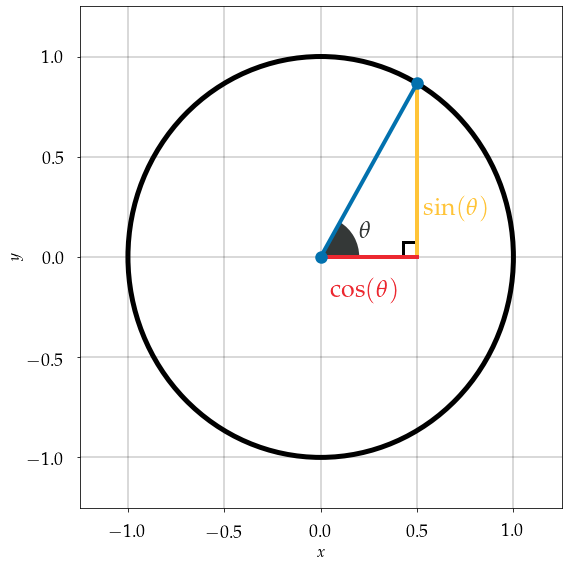

In [6]:
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
plt.figure()

ax = plt.gca()

angle = np.pi / 3
x, y = np.cos(angle), np.sin(angle)

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=5, fill=False)

plt.text(0.53, 0.21, r'$\sin(\theta)$', size=25, color=colors[2])
plt.plot([x, x], [0, y], linewidth=4, color=colors[2])

plt.text(0.05, -0.2, r'$\cos(\theta)$', size=25, color=colors[1])
plt.plot([0, x], [0, 0], color=colors[1])

plt.plot([0, x], [0, y], marker='.', markersize=25, linewidth=4)

arc = patches.Wedge((0, 0), 0.2, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[3])
plt.text(0.2, 0.1, r'$\theta$', size=25, color=colors[3])
right = patches.Rectangle((x, 0), -0.075, 0.075, edgecolor='k', facecolor='w', linewidth=3)
ax.add_patch(right)
ax.add_patch(circ)
ax.add_patch(arc)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25]);
plt.xlabel('$x$')
plt.ylabel('$y$');

Note that when the circle has a radius of 1, the hypotenuse (${\color{#0271AE}/}$) will always have length 1, so $\sin$ and $\cos$ measure the height and width of the triangle.

By convention, we take $\theta=0$ to be the right-most point on the circle, the point $(x=1, y=0)$.  Positive angles $\theta > 0$ correspond to a **counter-clockwise** (upward) rotation from $(1, 0)$.  Negative angles $\theta < 0$ correspond to a **clockwise** (downward) rotation.

Remember: **sines and cosines turn angles into distances**.

***Why does this give us waves?***

The sine or cosine of a single angle just gives us a single number, between -1 and +1.
A single number is not enough to get a wave---for that, we'll need to change the angle over time.
Imagine the angle varying continuously over time, like the seconds hand of a clock.
We'll denote this by $\theta(t)$, and have $\theta(0) = 0$ indicate that the starting position is at the right-most point on the circle $(1, 0)$.

Equivalently, we can think of this changing $\theta(t)$ in terms of the $(x, y)$-position of the point on the circle at the corresponding angle.
To get a wave out of this continuous rotation, we can look at what happens to just one of the two coordinates this point, which will be given by 

$$
x(t) = \cos(\theta(t)), \quad\quad\quad y(t) = \sin(\theta(t)).
$$

This process is illustrated by the animation below.

In [41]:
%%capture
# Draw a 2-pane animation of the moving point, and the wave being traced out horizontally and vertically
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

fig = plt.figure()

n_frames = 360

ax = plt.subplot(2, 2, 3)

angle = np.pi / 3
x, y = np.cos(angle), np.sin(angle)

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=5, fill=False)
ax.add_patch(circ)

arc = patches.Wedge((0, 0), 0.25, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[3])
ax.add_patch(arc)

hypotenuse = ax.plot([x, x], [0, y], linewidth=4, color=colors[2])[0]
xline = ax.plot([0, x], [0, 0], color=colors[1])[0]
yline = ax.plot([0, x], [0, y], marker='.', markersize=25, linewidth=4)[0]

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25]);
plt.xlabel('$x$')
plt.ylabel('$y$');

# Draw the y wave
t = np.linspace(0, 2 * np.pi, endpoint=False, num=1000)

ax_y = plt.subplot(2,2,4, sharey=ax)
ax_y.axhline(0, color='k', linewidth=2)
ax_y.plot(t, np.sin(t), color=colors[2], alpha=0.5)
vert_line = ax_y.plot([angle, angle], [0, y], color=colors[2], label=r'$\sin(\theta)$')[0]
ax_y.tick_params(labelleft=False)
plt.legend(loc='lower left')
ax_y.set_xlabel(r'$\theta$')
ax_y.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax_y.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax_y.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Draw the x wave
ax_x = plt.subplot(2,2,1, sharex=ax)
ax_x.axvline(0, color='k', linewidth=2)
ax_x.plot(np.cos(t), t, color=colors[1], alpha=0.5)
horiz_line = ax_x.plot([0, x], [angle, angle], color=colors[1], label=r'$\cos(\theta)$')[0]
plt.legend(loc='upper left')
ax_x.tick_params(labelbottom=False)
ax_x.set_ylabel(r'$\theta$')
ax_x.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax_x.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
ax_x.yaxis.set_major_formatter(plt.FuncFormatter(format_func))


def init():
    return arc, hypotenuse, xline, yline, vert_line, horiz_line

def animate(t):
    angle = 2 * np.pi * t / n_frames
    x, y = np.cos(angle), np.sin(angle)
    hypotenuse.set_data([x, x], [0, y])
    xline.set_data([0, x], [0, 0])
    yline.set_data([0, x], [0, y])
    vert_line.set_data([angle, angle], [0, y])
    horiz_line.set_data([0, x], [angle, angle])
    arc.set_theta2(angle * 180 / np.pi)
    return arc, hypotenuse, xline, yline, vert_line, horiz_line

animation = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=20, blit=True)

In [42]:
animation

As long as $\theta(t)$ keeps moving continuously, there will be some minimal time $t_0$ such that $\theta(t_0) = 0$ returns to its initial position: the first complete cycle.
We can translate this fundamental period $t_0$ into a frequency $f_0 = 1/t_0$, measuring the number of cycles completed in one second.

If we assume that $\theta(t)$ is moving at a constant speed, we would have

$$
\theta(t) = 2 \pi \cdot f_0 \cdot t,
$$

so that after $t=t_0$ seconds, $f_0 \cdot t_0 = 1$, and $\theta(t_0) = 2\pi \equiv 0$ because $2\pi$ radians completes a turn around the circle.
Typically, we don't bother with separate notation for $\theta(t)$.
Instead, we parametrize the $x$ and $y$ positions directly in terms of time and frequency:

$$
x(t) = \cos\left(2\pi \cdot f_0 \cdot t\right),\quad\quad y(t) = \sin\left(2\pi \cdot f_0 \cdot t\right)
$$

### Wave parameters

The equations above are helpful for providing a geometric interpretation of sinusoids, but they aren't quite general enough to describe every wave we might want.
Fortunately, it's not too much more work to do just that!

Every wave can be expressed in the following standardized form:

$$
x(t) = A \cdot \cos\left(2\pi \cdot f \cdot t + \phi\right).
$$

This form requires us to specify three parameters to describe the wave:
- $A$: the *amplitude* of the wave, how high it can rise or fall from 0;
- $f$: the *frequency* of the wave, how many cycles it completes in one second;
- $\phi$: the *phase* offset of the wave, the starting position (in radians) at time $t=0$.

Changing the amplitude $A$ has the effect of stretching or compressing the wave *vertically*.  $A$ can be also be interpreted as the radius of the circle along which our point is traveling.

Changing the frequency $f$ has the effect of stretching or compressing the wave *horizontally*.  $f$ can also be thought of as the speed at which our point travels.

Changing the phase offset $\phi$ has the effect of horizontally *shifting* the wave.  Positive $\phi$ moves the wave to the left, and negative $\phi$ moves the wave to the right.

In [2]:
%%capture
# Animations for changing amplitude, frequency, and phase

frame_rate = 20
t = np.linspace(0, 1, num=1000, endpoint=False)
plain_wave = np.cos(2 * np.pi * t)

n_frames = 20 * frame_rate

# Linear schedules are probably not so great here
# using a sinusoidal schedule would stick on the defaults a bit longer

# Amplitude schedule: 1 -> 2 -> 1 -> -1 -> 1
A_schedule = np.concatenate((np.linspace(1, 2, num=100, endpoint=False),
                                   np.linspace(2, 1, num=100, endpoint=False),
                                   np.linspace(1, -1, num=100, endpoint=False),
                                   np.linspace(-1, 1, num=100, endpoint=False),))

# Frequency schedule: 1 -> 3 -> 1 -> 1/9 -> 1
freq_schedule = np.concatenate((np.linspace(1, 3, num=100, endpoint=False),
                                      np.linspace(3, 1, num=100, endpoint=False),
                                      np.linspace(1, 1/9, num=100, endpoint=False),
                                      np.linspace(1/9, 1, num=100, endpoint=False),))

# Phase schedule: 0 -> 2pi -> 0 -> -pi -> 0
phase_schedule = np.concatenate((np.linspace(0, 2*np.pi, num=100, endpoint=False),
                                       np.linspace(2*np.pi, 0, num=100, endpoint=False),
                                       np.linspace(0, -2*np.pi, num=100, endpoint=False),
                                       np.linspace(-2*np.pi, 0, num=100, endpoint=False),))

fig = plt.figure()

ax1 = plt.subplot(3, 1, 1)
amp_wave = ax1.plot(t, plain_wave, color=colors[0], alpha=0.95, label=r'$A=1.00$')[0]
ax1.plot(t, plain_wave, color='k', alpha=0.25, label=r'$\cos(2\pi \cdot t)$')

ax1.tick_params(labelbottom=False)
legs = [ax1.legend(loc='lower right')]
ax1.set_ylim([-2.05, 2.05])

ax1.set_title(r'$A \cdot \cos(2\pi \cdot f \cdot t + \phi)$')

ax2 = plt.subplot(3, 1, 2, sharex=ax1)
ax2.plot(t,  plain_wave, color='k', alpha=0.25)
freq_wave = ax2.plot(t, plain_wave, color=colors[1], alpha=0.95, label=r'$f=1.00$ Hz')[0]

ax2.tick_params(labelbottom=False)
legs += [ax2.legend(loc='lower right')]

ax3 = plt.subplot(3, 1, 3, sharex=ax1)
ax3.plot(t,  plain_wave, color='k', alpha=0.25)
phase_wave = ax3.plot(t, plain_wave, color=colors[2], alpha=0.95, label=r'$\phi=0.00$ rad')[0]
ax3.set_xlabel(r'Time $t$ [seconds]')
legs += [ax3.legend(loc='lower right')]

def init():
    return amp_wave, freq_wave, phase_wave, legs[0], legs[1], legs[2]

def animate(i):
    amp_wave.set_data(t, A_schedule[i] * plain_wave)
    amp_wave.set_label('$A={:.02f}$'.format(A_schedule[i]))
    legs[0].texts[0].set_text(amp_wave.get_label())
    freq_wave.set_data(t, np.cos(2 * np.pi * freq_schedule[i] * t))
    freq_wave.set_label('$f={:.02f}$ Hz'.format(freq_schedule[i]))
    legs[1].texts[0].set_text(freq_wave.get_label())
    phase_wave.set_data(t, np.cos(2 * np.pi * t + phase_schedule[i]))
    phase_wave.set_label('$\\phi={:.02f}$ rad'.format(phase_schedule[i]))
    legs[2].texts[0].set_text(phase_wave.get_label())
    return amp_wave, freq_wave, phase_wave, legs[0], legs[1], legs[2]

animation = FuncAnimation(fig, animate, init_func=init,
                               frames=n_frames, interval=1000/frame_rate, blit=True)

In [3]:
animation

#### Some gotchas...

Every wave can be expressed in the above standard form, but that doesn't mean the representation is unique.
In general, there are multiple combinations of $(A, f, \phi)$ that each describe the same wave.
For example,

$$
x(t) = 2 \cdot \cos(2\pi \cdot f \cdot t) = -2 \cdot \cos(2\pi \cdot f \cdot t - \pi).
$$

This particular case arises because a phase offset of $\pi$ amounts to exactly half a turn around the circle.
The figure below demonstrates this effect: offset by $\phi = -\pi$ turns the wave upside-down, and if we also negate the amplitude (not pictured), the two waves would match up exactly.

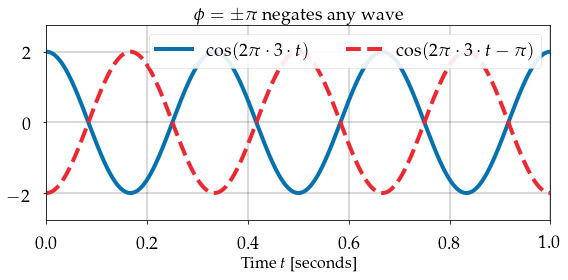

In [11]:
fs = 1000
t = np.linspace(0, 1, endpoint=False, num=1 * fs)

f = 3

x1 = 2 * np.cos(2 * np.pi * f * t)
x2 = 2 * np.cos(2 * np.pi * f * t - np.pi)
plt.figure(figsize=(8,4))

plt.plot(t, x1, label=r'$\cos(2\pi \cdot 3 \cdot t)$')
plt.plot(t, x2, label=r'$\cos(2\pi \cdot 3 \cdot t - \pi)$', linestyle='--')
plt.title(f'$\\phi=\\pm\\pi$ negates any wave')
plt.xlabel('Time $t$ [seconds]');
plt.legend(loc='upper right', ncol=2)

plt.xlim([-0.00, 1]);
plt.ylim([-2.75, 2.75]);

Most of the time, this ambiguity of representation doesn't cause us too many troubles.
It's sometimes useful to know about this though, especially when algebraically manipulating wave equations.
We won't do too much of that here, but it's good to keep in mind.

---

## Properties of waves

We'll round out this section with a few facts about waves that will be useful in the later chapters.


### Symmetry and anti-symmetry

The cosine function has a horizontal symmetry: $\cos(\theta) = \cos(-\theta)$.  (Sometimes called an *even function*.)
This can be understood geometrically: positive $\theta$ means counter-clockwise rotation, and negative $\theta$ means clockwise rotation.
In both cases, the horizontal position is the same as long as the absolute value of the angle is preserved.

By contrast, the sine function as a horizontal *anti-symmetry*: $\sin(-\theta) = -\sin(\theta)$.
This also can be understood geometrically as above, except now changing the direction of the rotation means flipping vertically across the horizontal axis.

These symmetries are summarized visually below by observing that negating the angle $-\theta$ preserves horizontal position of the point on the circle, but negates the vertical position.

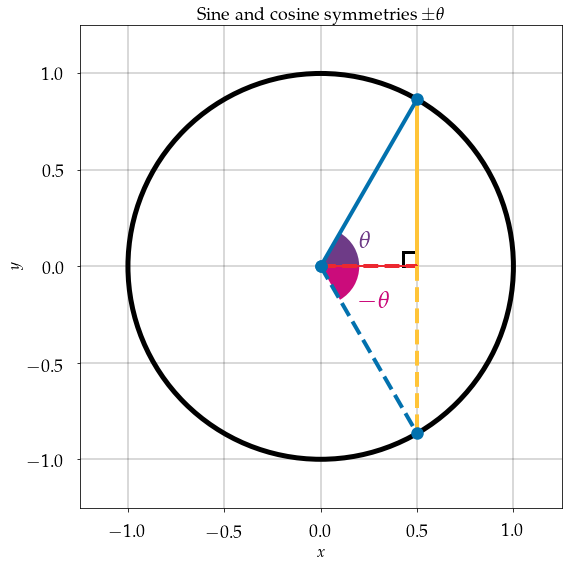

In [9]:
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
plt.figure()

ax = plt.gca()

angle = np.pi / 3
x, y = np.cos(angle), np.sin(angle)

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=5, fill=False)

plt.plot([x, x], [0, y], linewidth=4, color=colors[2])

plt.plot([0, x], [0, 0], color=colors[1], linestyle='-', linewidth=2)
plt.plot([0, x], [0, 0], color=colors[1], linestyle='--')

plt.plot([0, x], [0, y], marker='.', markersize=25, linewidth=4)
arc = patches.Wedge((0, 0), 0.2, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[4])
plt.text(0.2, 0.1, r'$\theta$', size=25, color=colors[4])

ax.add_patch(circ)
ax.add_patch(arc)

#arc2 = patches.Arc((0, 0), width=0.4, height=-0.4, theta1=0, theta2=-angle * 180 / np.pi, color=colors[3], linewidth=3, linestyle='--')
arc2 = patches.Wedge((0, 0), 0.2, theta2=0, theta1=-angle * 180 / np.pi, facecolor=colors[8])
plt.text(0.2, -0.2, r'$-\theta$', size=25, color=colors[8])
ax.add_patch(arc2)
right = patches.Rectangle((x, 0), -0.075, 0.075, edgecolor='k', facecolor='w', linewidth=3)
ax.add_patch(right)
plt.plot([x, x], [0, -y], linewidth=4, color=colors[2], linestyle='--')
plt.plot([0, x], [0, -y], marker='.', markersize=25, linewidth=4, linestyle='--', color=colors[0])
plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25]);
plt.xlabel('$x$')
plt.ylabel('$y$');
plt.title(r'Sine and cosine symmetries $\pm\theta$');

### Converting between sine and cosine

Every cosine can be expressed as a sine with an appriopriate phase offset, and vice versa.
The rule for this is as follows

$$
\sin(\theta) = \cos(\pi/2 - \theta)
$$

$$
\cos(\theta) = \sin(\pi/2 - \theta)
$$

These rules follow from the fact that all triangles have angles which sum to $\pi$ radians, and that we're dealing specifically with right triangles.
If one angle is $\theta$, the corner has angle $\pi/2$ (90 degrees), then the remaining angle must be $\pi/2 - \theta$, so that the sum totals to $\pi$:

$$
\theta + \frac{\pi}{2} + \left(\frac{\pi}{2} - \theta\right) = \frac{\pi}{2} + \frac{\pi}{2} + \theta - \theta = \pi.
$$

Finally, the cosine of one angle is the sine of the other (and vice versa).
In the example below, $\cos(\theta)$ is the ratio of the adjacent side (in red) to the hypotenuse (in blue), which is also the sine of the opposing angle.
Simialrly, $\sin(\theta)$ is the ratio of the opposite side (in yellow) to the hypotenuse (in blue), which is the cosine of the opposing angle $\pi/2 - \theta$.

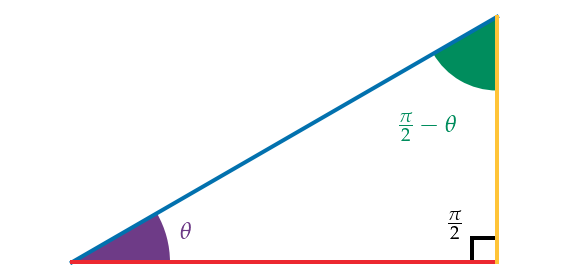

In [17]:
plt.figure(figsize=(8,4))
ax = plt.gca()

angle = np.pi / 6

x, y = np.cos(angle), np.sin(angle)

plt.plot([0, x], [0, y])
plt.plot([0, x], [0, 0])
plt.plot([x, x], [0, y])

arc = patches.Wedge((0, 0), 0.2, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[4])
plt.text(0.22, 0.05, r'$\theta$', size=25, color=colors[4])
ax.add_patch(arc)

arc2 = patches.Wedge((x, y), 0.15, theta2=-90, theta1=240 -angle * 180 / np.pi, facecolor=colors[5])
plt.text(x - 0.2, y-0.25, r'$\frac{\pi}{2} - \theta$', size=25, color=colors[5])
ax.add_patch(arc2)

right = patches.Rectangle((x, 0), -0.05, 0.05, edgecolor='k', facecolor='w', linewidth=4)
ax.add_patch(right)
plt.text(x - 0.1, 0.05, r'$\frac{\pi}{2}$', size=25, color='k')

plt.xticks([])
plt.yticks([])
plt.axis('equal')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False);

### Averaging over time

Imagine that we have a wave with some frequency $f_0$, or equivalently, a fundamental period $t_0 = 1/f_0$.
If you were to look at the average value of the wave over the time interval $[0, t_0]$, it will always come out to 0.
This may seem like an obvious fact, but it is worth reasoning through carefully.

A careful proof of this statement can be done with calculus, but we can also reason about it intuitively via symmetry:

- The time interval $[0, t_0]$ corresponds to one full rotation around the circle.
- The circle has equally much perimeter in one half of the plane (e.g., $x<0$) as the other (e.g., $x>0$).
- For every position $(x, y)$ the point on the circle occupies during our time interval, it must also pass through the opposite point $(-x, -y)$ at some other time during our time interval.  These two points cancel each other out and sum to 0.
- Since all points are cancelled to 0, so is the total sum.

Note that the above argument only works if the time interval covers exactly one cycle of the wave.  The argument can be extended to cover other intervals of the same duration, or intervals spanning a whole number of cycles.  However, it **does not** extend to fractional cycles!  If you don't cover exactly a whole number of cycles, the average will not be 0.  This observation will become very important later on when using the Fourier transform to analyze the contents of signals.

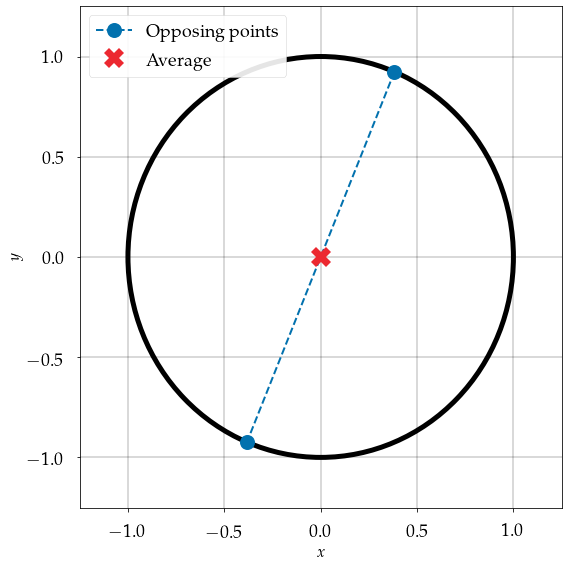

In [14]:
# Plot for average cancellation
plt.figure()

ax = plt.gca()

angle = 3 * np.pi / 8
x, y = np.cos(angle), np.sin(angle)
x2, y2 = -x, -y

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=5, fill=False)
ax.add_patch(circ)

plt.plot([x, x2], [y, y2], marker='.', markersize=30, linewidth=2, linestyle='--', label='Opposing points')
plt.plot(0, 0, marker='X',  markersize=20, linestyle='', color=colors[1], label='Average')
plt.legend()
plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25]);
plt.xlabel('$x$')
plt.ylabel('$y$');